# Digital Image Processing - Assignment 2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Blurry Moments

Kernel have been used based on the following structure:
<br></br>
<img src="../images/Q1.png" alt="drawing" style="width:600px;"/>  
source: [Lecture-6](https://iiitaphyd-my.sharepoint.com/:p:/g/personal/ravi_kiran_iiit_ac_in/EaPvCPLG3h9Jm9qPOXEI3OUB7CGf1m3Dr3qOJDm_jLTd7Q?e=7SIa8S)

In [2]:
# util function to get gray-scale image from RGB image
def convert_to_grey(image1):

    blue_channel  = image1[:,:,0]
    green_channel = image1[:,:,1]
    red_channel   = image1[:,:,2]
    
    # Taking intensity value as a weighted sum of RGB
    grey_img = 0.3*red_channel + 0.59*green_channel + 0.11*blue_channel
    grey_img = np.stack((grey_img,)*3, axis=-1)
    grey_img = grey_img.astype(int)

    return grey_img

In [3]:
def padded_img(img, k):
    [ogh, ogw] = img.shape
    sz = k//2
    gg = np.zeros((img.shape[0] + 2*sz, img.shape[1] + 2*sz))
    gg[sz:sz+ogh,sz:sz+ogw] = img
    return gg

def convolve(img, kernel):
    
    k = kernel.shape[0]
    img = img[:, :, 0]
    res = np.zeros((img.shape[0], img.shape[1]))
    img = padded_img(img, k)
    
    for x in range(res.shape[0]):
        for y in range(res.shape[1]):
            res[x][y]+= max(0, np.sum(img[x:x+k,y:y+k]*kernel))
            
    res = res.astype(np.int)
    return res

In [4]:
def high_boost_filter(size, A):
    kernel = np.ones((size, size))
    kernel[int(size / 2)][int(size / 2)] = 0
    kernel = -kernel
    kernel[int(size / 2)][int(size / 2)] = (size * size * A) - 1
    return kernel

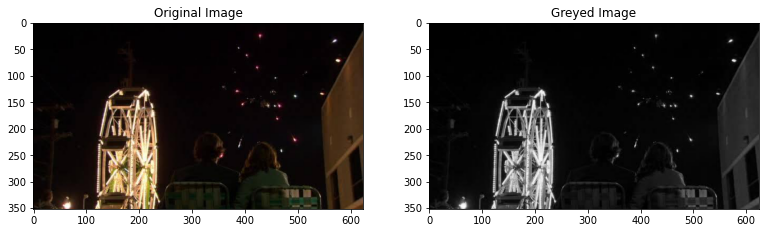

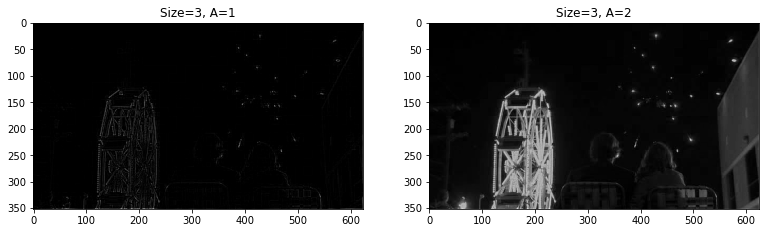

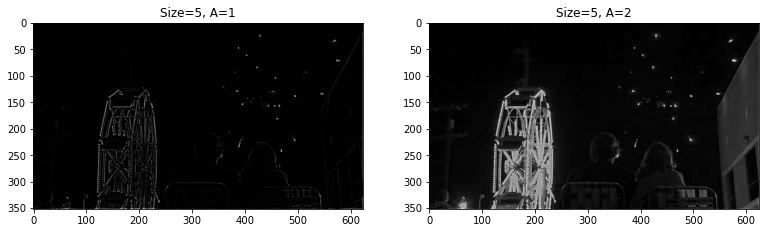

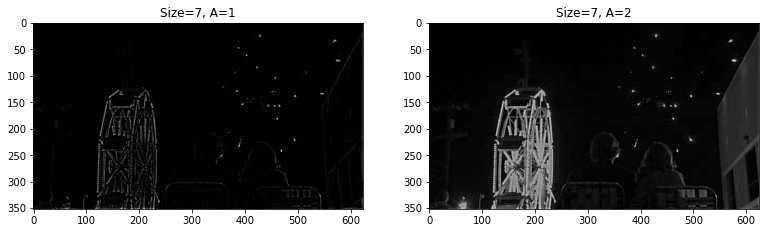

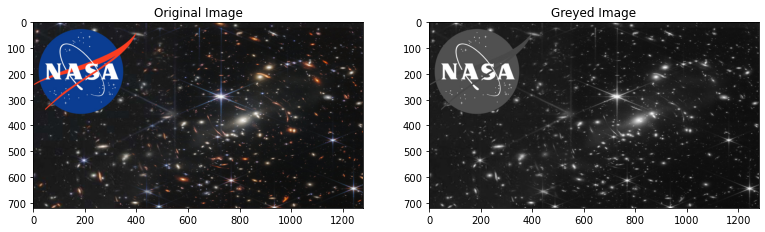

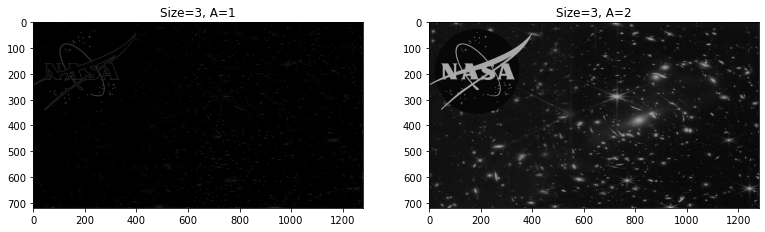

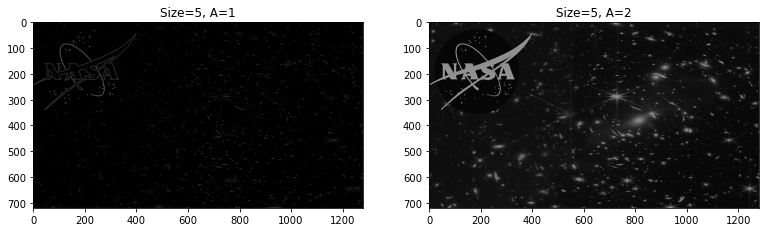

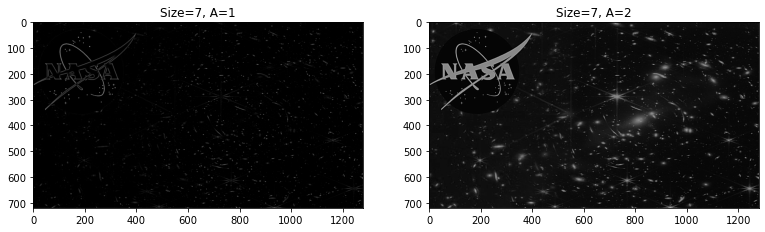

In [5]:
images = ['../images/Jam.jpg', '../images/webb.jpg']
sizes = [3, 5, 7]
A = [1, 2]

for im in images:
    
    img = cv2.imread(im)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    grey_img = convert_to_grey(img)
    
    f, ax = plt.subplots(1, 2, figsize=(13, 6))
    ax[0].imshow(img)
    ax[0].set_title("Original Image")
    ax[1].imshow(grey_img)
    ax[1].set_title("Greyed Image")
    plt.show()

    for size in sizes:
        f, ax = plt.subplots(1, 2, figsize=(13, 6))
        for i, a in enumerate(A):
            kernel = high_boost_filter(size, a)
            res = convolve(img, kernel)
            ax[i].imshow(res, cmap='gray')
            ax[i].set_title(f"Size={size}, A={a}")
        plt.show()